In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
data = pd.read_csv('cleaned_data.csv')

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0
26663,15d69f9f-5ad3,50000,1,2,1,46,0,0,0,0,...,1430,1000,1000,1000,1,university,0,0,0,1


In [5]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [7]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,graduate school,high school,others,university
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,...,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,167919.054905,1.603060,1.842334,1.556031,35.505213,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,...,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047,0.221797,0.352985,0.164266,0.015527,0.467222
std,129839.453081,0.489272,0.744661,0.521463,9.227442,1.126769,1.198640,1.199165,1.167897,1.131735,...,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185,0.415463,0.477907,0.370524,0.123637,0.498934
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,8.020000e+02,390.000000,294.750000,242.750000,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,800000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000


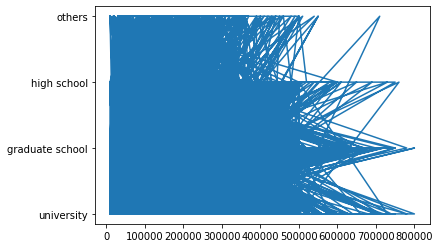

In [8]:
plt.plot(data['LIMIT_BAL'], data['EDUCATION_CAT'])

In [42]:
x1 = data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',  'graduate school',
       'high school', 'others', 'university']]
y1 = data['default payment next month']

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split (x1, y1, test_size = 0.3, random_state = 90)

In [44]:
lm = LogisticRegression()

In [45]:
lm.fit(xtrain, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
pred = lm.predict(xtest)

In [49]:
print("CR",classification_report(ytest,pred))
print("CM",confusion_matrix(ytest,pred))
#print("Accuracy",lm.score(ytest,pred))

CR               precision    recall  f1-score   support

           0       0.78      1.00      0.87      6223
           1       0.25      0.00      0.00      1777

    accuracy                           0.78      8000
   macro avg       0.51      0.50      0.44      8000
weighted avg       0.66      0.78      0.68      8000

CM [[6220    3]
 [1776    1]]


In [50]:
kn = KNeighborsClassifier()

In [52]:
kn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [55]:
pred = kn.predict(xtest)
pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [56]:
print("CR",classification_report(ytest,pred))
print("CM",confusion_matrix(ytest,pred))
#print("Accuracy",lm.score(ytest,pred))

CR               precision    recall  f1-score   support

           0       0.80      0.92      0.86      6223
           1       0.39      0.17      0.24      1777

    accuracy                           0.76      8000
   macro avg       0.59      0.55      0.55      8000
weighted avg       0.71      0.76      0.72      8000

CM [[5751  472]
 [1473  304]]


In [58]:
svm = SVC()

In [59]:
svm.fit(xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
pred = svm.predict(xtest)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
print("CR",classification_report(ytest,pred))
print("CM",confusion_matrix(ytest,pred))
#print("Accuracy",lm.score(ytest,pred))

CR               precision    recall  f1-score   support

           0       0.78      1.00      0.88      6223
           1       0.00      0.00      0.00      1777

    accuracy                           0.78      8000
   macro avg       0.39      0.50      0.44      8000
weighted avg       0.61      0.78      0.68      8000

CM [[6223    0]
 [1777    0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
dt = DecisionTreeClassifier()

In [63]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
pred = dt.predict(xtest)

In [65]:
print("CR",classification_report(ytest,pred))
print("CM",confusion_matrix(ytest,pred))
#print("Accuracy",lm.score(ytest,pred))

CR               precision    recall  f1-score   support

           0       0.83      0.82      0.82      6223
           1       0.40      0.43      0.41      1777

    accuracy                           0.73      8000
   macro avg       0.62      0.62      0.62      8000
weighted avg       0.74      0.73      0.73      8000

CM [[5081 1142]
 [1021  756]]


In [66]:
rf = RandomForestClassifier()

In [67]:
rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
pred = rf.predict(xtest)

In [69]:
print("CR",classification_report(ytest,pred))
print("CM",confusion_matrix(ytest,pred))
#print("Accuracy",lm.score(ytest,pred))

CR               precision    recall  f1-score   support

           0       0.84      0.94      0.89      6223
           1       0.66      0.37      0.47      1777

    accuracy                           0.82      8000
   macro avg       0.75      0.66      0.68      8000
weighted avg       0.80      0.82      0.80      8000

CM [[5877  346]
 [1120  657]]


In [70]:
gb = GradientBoostingClassifier()

In [71]:
gb.fit(xtrain, ytrain)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [72]:
pred = gb.predict(xtest)

In [73]:
print("CR",classification_report(ytest,pred))
print("CM",confusion_matrix(ytest,pred))
#print("Accuracy",lm.score(ytest,pred))

CR               precision    recall  f1-score   support

           0       0.84      0.95      0.89      6223
           1       0.68      0.37      0.48      1777

    accuracy                           0.82      8000
   macro avg       0.76      0.66      0.69      8000
weighted avg       0.80      0.82      0.80      8000

CM [[5907  316]
 [1119  658]]


In [74]:
nb = GaussianNB()

In [75]:
nb.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [76]:
pred = nb.predict(xtest)

In [77]:
print("CR",classification_report(ytest,pred))
print("CM",confusion_matrix(ytest,pred))
#print("Accuracy",lm.score(ytest,pred))

CR               precision    recall  f1-score   support

           0       0.89      0.22      0.36      6223
           1       0.25      0.90      0.39      1777

    accuracy                           0.37      8000
   macro avg       0.57      0.56      0.37      8000
weighted avg       0.74      0.37      0.36      8000

CM [[1384 4839]
 [ 179 1598]]
